In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/modrec

Mounted at /content/drive/
/content/drive/My Drive/modrec


In [3]:
# Import all the things we need ---
#   by setting env variables before Keras import you can set up which backend and which GPU it uses

import os,random
os.environ["KERAS_BACKEND"] = "tensorflow"
# os.environ["THEANO_FLAGS"]  = "device=gpu%d"%(0)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
#from matplotlib import pyplot as plt
import pickle, random, sys
import keras
import keras.backend as K
from keras.callbacks import LearningRateScheduler,TensorBoard
from tensorflow.keras.optimizers import Adam
import csv
import mltools,rmldataset2016
#import rmlmodels.CNN2Model as cnn2

In [66]:
import os
import numpy as np
import keras.models as models
from keras.layers import Reshape,Dense,Dropout,Activation,Flatten, Input
from keras.layers import Convolution2D,Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, BatchNormalization
from keras.models import Model
from keras import regularizers

def CNN2Model(weights=None,
             input_shape=[2,128],
             classes=11,
             **kwargs):
    if weights is not None and not (os.path.exists(weights)):
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization), '
                         'or the path to the weights file to be loaded.')

    dr = 0.5 # dropout rate (%)

    input = Input(shape=input_shape + [1], name='input')


    x = Reshape(target_shape=input_shape + [1])(input)


    x = Conv2D(50, (1, 8), padding='same', activation="leaky_relu", name="conv1", kernel_initializer='glorot_uniform', kernel_regularizer="l2")(x)
    x = BatchNormalization()(x) # Add batch normalization
    x = Dropout(dr)(x)

    x = Conv2D(50, (2, 8), padding="valid", activation="leaky_relu", name="conv2", kernel_initializer='glorot_uniform')(x)
    x = BatchNormalization()(x) # Add batch normalization
    x = Dropout(dr)(x)

    x = Flatten()(x)

    x = Dense(256, activation='relu', kernel_initializer='he_normal', name="dense1")(x)
   # x = BatchNormalization()(x) # Add batch normalization
    x = Dropout(dr)(x)

    x = Dense(classes, kernel_initializer='he_normal', name="dense2")(x)
    output = Activation('softmax')(x)

    model = Model(inputs=input, outputs=output)

    # Load weights.
    if weights is not None:
        model.load_weights(weights)

    return model

if __name__ == '__main__':
    print(CNN2Model().summary())

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2, 128, 1)]       0         
                                                                 
 reshape_29 (Reshape)        (None, 2, 128, 1)         0         
                                                                 
 conv1 (Conv2D)              (None, 2, 128, 50)        450       
                                                                 
 batch_normalization_33 (Ba  (None, 2, 128, 50)        200       
 tchNormalization)                                               
                                                                 
 dropout_69 (Dropout)        (None, 2, 128, 50)        0         
                                                                 
 conv2 (Conv2D)              (None, 1, 121, 50)        40050     
                                                          

channels_last
220000
132000
44000
44000
(132000, 2, 128)
(44000, 2, 128)
(44000, 2, 128)
(132000, 11)
(44000, 11)
(44000, 11)
(132000, 2, 128) [2, 128]
['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2, 128, 1)]       0         
                                                                 
 reshape_30 (Reshape)        (None, 2, 128, 1)         0         
                                                                 
 conv1 (Conv2D)              (None, 2, 128, 50)        450       
                                                                 
 batch_normalization_35 (Ba  (None, 2, 128, 50)        200       
 tchNormalization)                                               
                                                                 
 dropout

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


264/264 - 8s - loss: 1.9572 - accuracy: 0.2793 - val_loss: 2.4715 - val_accuracy: 0.0909 - lr: 0.0010 - 8s/epoch - 31ms/step
Epoch 2/100

Epoch 2: val_loss did not improve from 2.47153
264/264 - 6s - loss: 1.6723 - accuracy: 0.3712 - val_loss: 2.8429 - val_accuracy: 0.1151 - lr: 0.0010 - 6s/epoch - 21ms/step
Epoch 3/100

Epoch 3: val_loss did not improve from 2.47153
264/264 - 6s - loss: 1.5870 - accuracy: 0.4013 - val_loss: 3.1887 - val_accuracy: 0.2314 - lr: 0.0010 - 6s/epoch - 23ms/step
Epoch 4/100

Epoch 4: val_loss improved from 2.47153 to 1.70219, saving model to weights/weights2.h5
264/264 - 7s - loss: 1.5464 - accuracy: 0.4127 - val_loss: 1.7022 - val_accuracy: 0.3593 - lr: 0.0010 - 7s/epoch - 27ms/step
Epoch 5/100

Epoch 5: val_loss improved from 1.70219 to 1.46967, saving model to weights/weights2.h5
264/264 - 6s - loss: 1.5062 - accuracy: 0.4264 - val_loss: 1.4697 - val_accuracy: 0.4270 - lr: 0.0010 - 6s/epoch - 23ms/step
Epoch 6/100

Epoch 6: val_loss improved from 1.46967 

KeyError: 'acc'

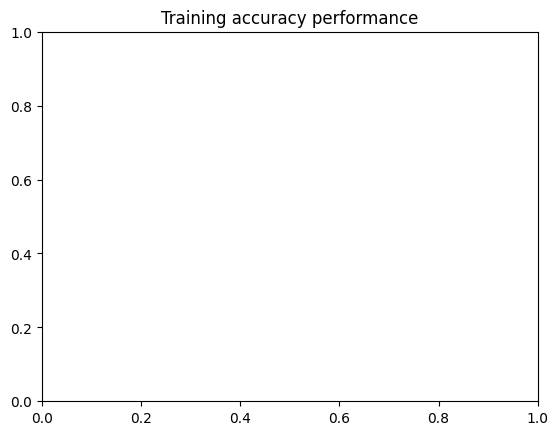

In [67]:

#set Keras data format as channels_first
K.set_image_data_format('channels_last')
print(K.image_data_format())

(mods,snrs,lbl),(X_train,Y_train),(X_val,Y_val),(X_test,Y_test),(train_idx,val_idx,test_idx) = \
    rmldataset2016.load_data()

in_shp = list(X_train.shape[1:])
print(X_train.shape, in_shp)
classes = mods
print(classes)


# Set up some params
nb_epoch = 100    # number of epochs to train on
batch_size = 500  # training batch size

model = CNN2Model(None, input_shape=in_shp,classes=len(classes))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.summary()

filepath = 'weights/weights2.h5'
history = model.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
    validation_data=[X_val,Y_val],
    callbacks = [
                keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
                keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,verbose=1,patince=5,min_lr=0.000001),
                keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode='auto')
                #keras.callbacks.TensorBoard(log_dir='./logs/',histogram_freq=1,write_graph=False,write_grads=1,write_images=False,update_freq='epoch')
                ]
                    )

mltools.show_history(history)

#Show simple version of performance
score = model.evaluate(X_test, Y_test, verbose=1, batch_size=batch_size)
print(score)

In [68]:
score = model.evaluate(X_test, Y_test, verbose=1, batch_size=batch_size)
print(score)

88/88 [==============================] - 1s 6ms/step - loss: 1.2925 - accuracy: 0.5018
[1.2924607992172241, 0.5018181800842285]


In [69]:
acc = {}
acc_mod_snr = np.zeros( (len(classes),len(snrs)) )
i = 0
!mkdir figure2
!mkdir predictresult2
def srn_plot():#save acc for mod per SNR
    def predict(model):
    # Plot confusion matrix
      model.load_weights(filepath)
      test_Y_hat = model.predict(X_test, batch_size=batch_size)
      confnorm,_,_ = mltools.calculate_confusion_matrix(Y_test,test_Y_hat,classes)
      mltools.plot_confusion_matrix(confnorm, labels=['8PSK','AM-DSB','AM-SSB','BPSK','CPFSK','GFSK','4-PAM','16-QAM','64-QAM','QPSK','WBFM'],save_filename='figure2/cnn2_total_confusion')

    # Plot confusion matrix
    acc = {}
    acc_mod_snr = np.zeros( (len(classes),len(snrs)) )
    i = 0
    for snr in snrs:

        # extract classes @ SNR
        # test_SNRs = map(lambda x: lbl[x][1], test_idx)
        test_SNRs = [lbl[x][1] for x in test_idx]

        test_X_i = X_test[np.where(np.array(test_SNRs) == snr)]
        test_Y_i = Y_test[np.where(np.array(test_SNRs) == snr)]

        # estimate classes
        test_Y_i_hat = model.predict(test_X_i)
        confnorm_i,cor,ncor = mltools.calculate_confusion_matrix(test_Y_i,test_Y_i_hat,classes)
        acc[snr] = 1.0 * cor / (cor + ncor)
        result = cor / (cor + ncor)
        with open('acc222.csv', 'a', newline='') as f0:
            write0 = csv.writer(f0)
            write0.writerow([result])
        mltools.plot_confusion_matrix(confnorm_i, labels=['8PSK','AM-DSB','AM-SSB','BPSK','CPFSK','GFSK','4-PAM','16-QAM','64-QAM','QPSK','WBFM'], title="Confusion Matrix",save_filename="figure2/Confusion(SNR=%d)(ACC=%2f).png" % (snr,100.0*acc[snr]))

        acc_mod_snr[:,i] = np.round(np.diag(confnorm_i)/np.sum(confnorm_i,axis=1),3)
        i = i +1

    #plot acc of each mod in one picture
    dis_num=11
    for g in range(int(np.ceil(acc_mod_snr.shape[0]/dis_num))):
        assert (0 <= dis_num <= acc_mod_snr.shape[0])
        beg_index = g*dis_num
        end_index = np.min([(g+1)*dis_num,acc_mod_snr.shape[0]])

        plt.figure(figsize=(12, 10))
        plt.xlabel("Signal to Noise Ratio")
        plt.ylabel("Classification Accuracy")
        plt.title("Classification Accuracy for Each Mod")

        for i in range(beg_index,end_index):
            plt.plot(snrs, acc_mod_snr[i], label=classes[i])
            # 设置数字标签
            for x, y in zip(snrs, acc_mod_snr[i]):
                plt.text(x, y, y, ha='center', va='bottom', fontsize=8)

        plt.legend()
        plt.grid()
        plt.savefig('figure2/acc_with_mod_{}.png'.format(g+1))
        plt.close()
    #save acc for mod per SNR
    fd = open('predictresult2/acc_for_mod_on_cnn2.dat', 'wb')
    pickle.dump(('128','cnn2', acc_mod_snr), fd)
    fd.close()

    # Save results to a pickle file for plotting later
    print(acc)
    fd = open('predictresult2/cnn2_d0.5.dat','wb')
    pickle.dump( ("CNN2", 0.5, acc) , fd )

    # Plot accuracy curve
    plt.plot(snrs, list(map(lambda x: acc[x], snrs)))
    plt.xlabel("Signal to Noise Ratio")
    plt.ylabel("Classification Accuracy")
    plt.title("Classification Accuracy on RadioML 2016.10 Alpha")
    plt.tight_layout()
    plt.savefig('figure2/each_acc.png')
    plt.close()
srn_plot()

mkdir: cannot create directory ‘figure2’: File exists
mkdir: cannot create directory ‘predictresult2’: File exists
69/69 [==============================] - 0s 3ms/step
{-20: 0.09, -18: 0.09272727272727273, -16: 0.09727272727272727, -14: 0.11090909090909092, -12: 0.12590909090909091, -10: 0.1918181818181818, -8: 0.3145454545454546, -6: 0.4727272727272727, -4: 0.5718181818181818, -2: 0.6695454545454546, 0: 0.7109090909090909, 2: 0.7263636363636363, 4: 0.73, 6: 0.7227272727272728, 8: 0.7381818181818182, 10: 0.7545454545454545, 12: 0.7268181818181818, 14: 0.7331818181818182, 16: 0.73, 18: 0.7263636363636363}
